variation of the frequency interval 

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from spectra import fas_psd_smooth
from gradient_to_kappa import gradient, kappa
from stats import bootstrap
from obspy import read, read_inventory
import seaborn as sns
# sns.set(style="whitegrid")
import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:

def kapparec_fr(newpath,fl,fu):
    pinv  = "/Users/psuroyo/Documents/Study_DataWork/PNR_TLS_Array/selected_mseed_p/Inventory/"
    inv = read_inventory(os.path.join(pinv,'pnr_inventory.xml'),'stationxml')
    out = 'VEL'
    nfft = 1000
    list_ev = [f for f in os.listdir(newpath) if not f.startswith('.')]

    evid=[]
    fall=[]
    fasn=[]
    kall=[]
    call=[]


    for ev in list_ev:
        s = read(os.path.join(newpath,ev,'*HH*'),format='mseed')
        if len(s)!= 1: 
            print('check number of traces and channel id')
            pass
        else:
            for tr in s:
                prefilter=[0.05,0.1,40,45]
                wl = 90
                tr.detrend("demean")
                tr.taper(max_percentage=0.05)
                try:
                    tr.remove_response(inv, output=out, pre_filt=prefilter, 
                                       zero_mean=True, taper=True, taper_fraction=0.05)
                except:
                    try:
                        # instrument response in seed format
                        path_dataless = '/Volumes/Samsung_T5/Secondment_GFZ/dataless' 
                        list_seed = [f for f in os.listdir(path_dataless) if not f.startswith('.')]
                        list_seed = [f for f in list_seed if f.endswith('_SEED')]
                        sta_id = sta + '_HH_'+ cha[-1]
                        insres_file = [f for f in list_seed if f.startswith(sta_id)]
                        if len(insres_file) >1:
                            dt=[]
                            for x in insres_file:
                                dates = (x.split('.')[-1]).split('_')
                                date = dates[0].split('-')
                                date = datetime.datetime.strptime((date[0]+'-'+date[1]+'-'+date[2]), '%Y-%m-%d')
                                dt.append(date)
                            dt_latest = max(dt).strftime("%Y-%m-%d")
                            inv_seed = [y for y in insres_file if dt_latest in y]
                            inv_seed = inv_seed[0]
                        else:
                            inv_seed = insres_file[0]
                        inv = read_inventory(os.path.join(path_dataless,inv_seed), format='SEED')
                        tr.remove_response(inv, output=out,  pre_filt=prefilter, water_level= wl)

                    except:
                        try:
                            # instrument response in RESP format
                            path_dataless = '/Volumes/Samsung_T5/Secondment_GFZ/dataless' 
                            list_resp = [f for f in os.listdir(path_dataless) if not f.startswith('.')]
                            list_resp = [f for f in list_resp if f.startswith('RESP')]
                            sta_id = sta + '..HH'+ cha[-1]
                            insres_file = [f for f in list_resp if sta_id in f]
                            inv_resp = insres_file[0]
                            inv = read_inventory(os.path.join(path_dataless,inv_resp), format='RESP')
                            tr.remove_response(inv, output=out,  pre_filt=prefilter, water_level= wl)
                            print(tr)
                        except:
                            print("no instrument response found for: " + (ev + "_"+ tr.id) + "!")
                            pass
                f, fas, psd,smooth= fas_psd_smooth(tr, nfft, smoothing='konno-ohmachi',
                                                               smoothing_count=1, smoothing_constant=40)
                nor_fas = smooth/ len(smooth)
                coef,poly1d, x, y = gradient (upperf, lowerf, np.log(nor_fas), f)
                kr = kappa(coef[0])

                evid.append(ev)
                kall.append(kr)
                call.append(coef[1])
    return evid,kall,call

In [3]:
# 1. DEFINE INPUT (STATION ID, NETWORK ID, Freq bounds, Inventory); output directory
direc='/Users/psuroyo/Downloads/'
folder_year ='Noise_1/2019'
net= 'LV'
sta= 'L001'
cha ='HHE'
dest_dir =os.path.join("/Users/psuroyo/Downloads/Noise_trim",'kappa_store')
folder_noise ='Noise_trim/2019'
newpath = os.path.join(direc,folder_noise,net,sta,cha)

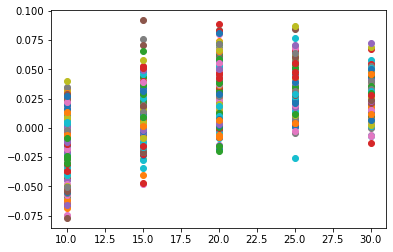

In [4]:
fl = np.arange(5,30,5)
fu = np.arange(15,40,5)
krfall=[]
crfall=[]
ev=[]
fx=[]

pinv  = "/Users/psuroyo/Documents/Study_DataWork/PNR_TLS_Array/selected_mseed_p/Inventory/"
inv = read_inventory(os.path.join(pinv,'pnr_inventory.xml'),'stationxml')
out = 'VEL'
nfft = 1000
list_ev = [f for f in os.listdir(newpath) if not f.startswith('.')]

# evid=[]
# fall=[]
# fasn=[]
# kall=[]
# call=[]
dkev=[]
fig,ax = plt.subplots()
for ev in list_ev:
    s = read(os.path.join(newpath,ev,'*HH*'),format='mseed')
    if len(s)!= 1: 
        print('check number of traces and channel id')
        pass
    else:
        for tr in s:
            prefilter=[0.05,0.1,40,45]
            wl = 90
            tr.detrend("demean")
            tr.taper(max_percentage=0.05)
            try:
                tr.remove_response(inv, output=out, pre_filt=prefilter, 
                                   zero_mean=True, taper=True, taper_fraction=0.05)
            except:
                try:
                    # instrument response in seed format
                    path_dataless = '/Volumes/Samsung_T5/Secondment_GFZ/dataless' 
                    list_seed = [f for f in os.listdir(path_dataless) if not f.startswith('.')]
                    list_seed = [f for f in list_seed if f.endswith('_SEED')]
                    sta_id = sta + '_HH_'+ cha[-1]
                    insres_file = [f for f in list_seed if f.startswith(sta_id)]
                    if len(insres_file) >1:
                        dt=[]
                        for x in insres_file:
                            dates = (x.split('.')[-1]).split('_')
                            date = dates[0].split('-')
                            date = datetime.datetime.strptime((date[0]+'-'+date[1]+'-'+date[2]), '%Y-%m-%d')
                            dt.append(date)
                        dt_latest = max(dt).strftime("%Y-%m-%d")
                        inv_seed = [y for y in insres_file if dt_latest in y]
                        inv_seed = inv_seed[0]
                    else:
                        inv_seed = insres_file[0]
                    inv = read_inventory(os.path.join(path_dataless,inv_seed), format='SEED')
                    tr.remove_response(inv, output=out,  pre_filt=prefilter, water_level= wl)

                except:
                    try:
                        # instrument response in RESP format
                        path_dataless = '/Volumes/Samsung_T5/Secondment_GFZ/dataless' 
                        list_resp = [f for f in os.listdir(path_dataless) if not f.startswith('.')]
                        list_resp = [f for f in list_resp if f.startswith('RESP')]
                        sta_id = sta + '..HH'+ cha[-1]
                        insres_file = [f for f in list_resp if sta_id in f]
                        inv_resp = insres_file[0]
                        inv = read_inventory(os.path.join(path_dataless,inv_resp), format='RESP')
                        tr.remove_response(inv, output=out,  pre_filt=prefilter, water_level= wl)
                        print(tr)
                    except:
                        print("no instrument response found for: " + (ev + "_"+ tr.id) + "!")
                        pass
            f, fas, psd,smooth= fas_psd_smooth(tr, nfft, smoothing='konno-ohmachi',
                                                           smoothing_count=1, smoothing_constant=40)
            nor_fas = smooth/ len(smooth)
            kall=[]
            for ind in range(len(fu)):
                coef,poly1d, x, y = gradient (fl[ind], fu[ind], np.log(nor_fas), f)
                kr = kappa(coef[0])
                dkf = pd.DataFrame({'kr':kr, 'fl':fl[ind],'fu':fu[ind],'cr':coef[1]}, index=[0])
                kall.append(dkf)
            dkall= pd.concat(kall)
            ax.scatter(dkall.fl+ (dkall.fu - dkall.fl)/2, dkall.kr)
        dkev.append(dkall)
dk = pd.concat(dkev)
    
    
#     evid, krf,crf = kapparec_fr(newpath,fl[i],fu[i])
#     fx.append(np.full(len(krf), fl[i]+((fu[i]-fl[i])/2)))
#     krfall.append(krf)
#     ev.append(evid)
#     crfall.append(crf)

In [13]:
dk

,kr,fl,fu,cr
0,0.019778,5,15,-17.571712
0,0.010362,10,20,-17.909213
0,-0.018054,15,25,-19.467276
0,0.003107,20,30,-18.022050
0,0.046635,25,35,-14.214146
...,...,...,...,...
0,-0.036998,5,15,-17.951595
0,-0.015858,10,20,-17.346861
0,0.042859,15,25,-14.113480
0,0.043781,20,30,-13.971860


/opt/anaconda3/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/opt/anaconda3/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only vali

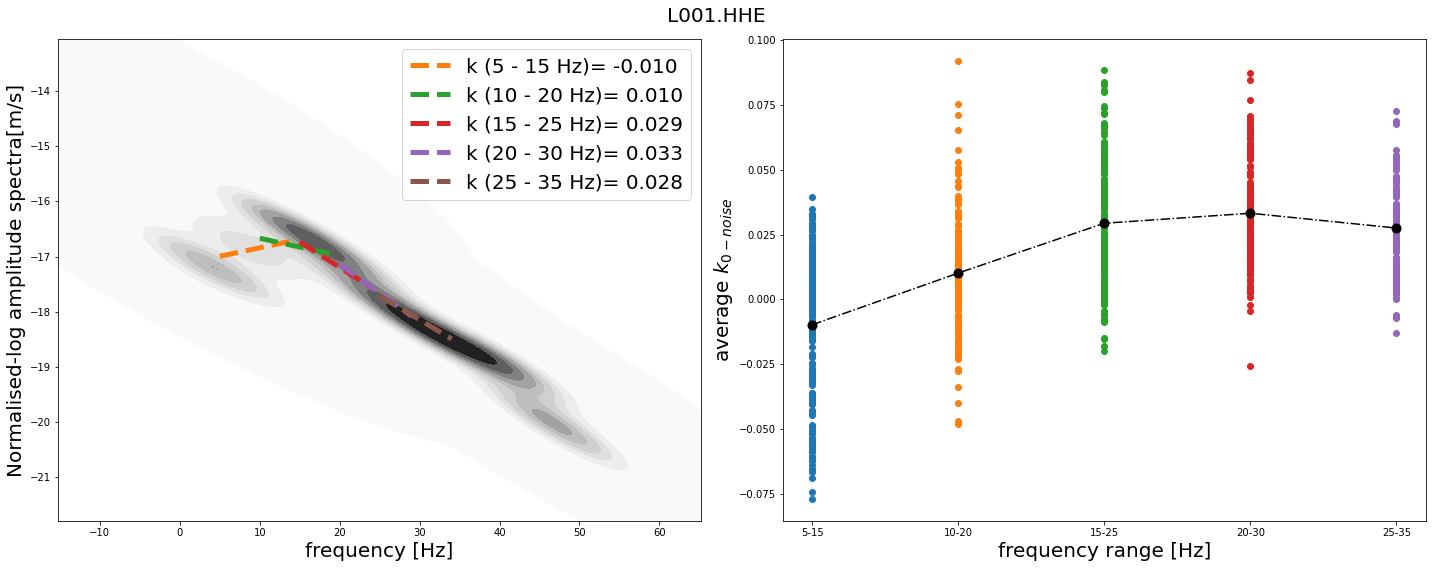

In [5]:
import warnings
warnings.simplefilter("ignore", UserWarning)
from matplotlib.pyplot import cm
dest_dir = os.path.join("/Users/psuroyo/Downloads/Noise_trim",'kappa_store')
dirsta = os.path.join(dest_dir,'fas_allrec')
list_sta = [f for f in os.listdir(dirsta)]
list_sta = [f for f in list_sta if sta in f]
list_sta_cha = [f for f in list_sta if cha in f]
file = pd.read_csv(os.path.join(dirsta,list_sta_cha[0]))
nfas = file.avg_fas
f = file.f
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
# fig,bx =plt.subplots()
sns.kdeplot(f, np.log(nfas), cmap='Greys', shade=True, thresh=0,ax=ax[0])
color=cm.rainbow(np.linspace(0,1,len(fl)))
xlable=[]
ylable=[]
for i in range(len(fl)):
    a  = dk[dk.fl == fl[i]]
    a['xlbl'] = (a.fl).astype(str)+'-'+(a.fu).astype(str)
    a = a.reset_index(drop=True)
    k0 = np.mean((a))
    x = np.arange(k0.fl,k0.fu)
    pols=np.poly1d([-k0.kr *(np.pi),round(k0.cr,1)+.75])
#    "{0:.1f} and the other no {0:.2f}".format(a,b)) 
    ax[0].plot(x, (pols(x)),linestyle='dashed',linewidth=5.0,
            label = 'k ({:.0f} - {:.0f} Hz)= {:.3f}'.format(k0.fl, k0.fu,(k0.kr)))# label='$k_{f}$'+"{:.3f}".format(abs(k0.kr)))
#     k0['xlbl'] = (k0.fl).astype(str)+'-'+(k0.fu).astype(str)
#     cx.scatter(k0.xlbl,k0.kr)
    xlable.append(a.xlbl[0])
    ylable.append(np.mean(a.kr))
    ax[1].scatter(a.xlbl,a.kr)
ax[1].plot(xlable,ylable,'-.k', marker='o', markersize=9)
ax[0].set(xlabel=None)
ax[0].set(ylabel=None)
ax[0].legend(loc='upper right',fontsize=20)
fig.suptitle(str(sta)+'.'+str(cha),fontsize=20)
ax[0].set_xlabel('frequency [Hz]',fontsize=20)
ax[0].set_ylabel('Normalised-log amplitude spectra[m/s]',fontsize=20)
ax[1].set_xlabel('frequency range [Hz]',fontsize=20)
ax[1].set_ylabel('average $k_{0-noise}$',fontsize=20)
fig.tight_layout()
fig.savefig(os.path.join(dest_dir,sta+cha+'_figure6.png'))

In [11]:
list_sta

['L001..HHE.15_40.csv', 'L001..HHN.15_40.csv', 'L001..HHZ.15_40.csv']

# RESUME

In [7]:

def plotkf_sta(newpath,net,sta,cha,fl,fu):
   
    krfall=[]
    crfall=[]
    ev=[]
    fx=[]

    pinv  = "/Users/psuroyo/Documents/Study_DataWork/PNR_TLS_Array/selected_mseed_p/Inventory/"
    inv = read_inventory(os.path.join(pinv,'pnr_inventory.xml'),'stationxml')
    out = 'VEL'
    nfft = 1000
    list_ev = [f for f in os.listdir(newpath) if not f.startswith('.')]

    dkev=[]
    for ev in list_ev:
        s = read(os.path.join(newpath,ev,'*HH*'),format='mseed')
        if len(s)!= 1: 
            print('check number of traces and channel id')
            pass
        else:
            for tr in s:
                prefilter=[0.05,0.1,40,45]
                wl = 90
                tr.detrend("demean")
                tr.taper(max_percentage=0.05)
                try:
                    tr.remove_response(inv, output=out, pre_filt=prefilter, 
                                       zero_mean=True, taper=True, taper_fraction=0.05)
                except:
                    try:
                        # instrument response in seed format
                        path_dataless = '/Volumes/Samsung_T5/Secondment_GFZ/dataless' 
                        list_seed = [f for f in os.listdir(path_dataless) if not f.startswith('.')]
                        list_seed = [f for f in list_seed if f.endswith('_SEED')]
                        sta_id = sta + '_HH_'+ cha[-1]
                        insres_file = [f for f in list_seed if f.startswith(sta_id)]
                        if len(insres_file) >1:
                            dt=[]
                            for x in insres_file:
                                dates = (x.split('.')[-1]).split('_')
                                date = dates[0].split('-')
                                date = datetime.datetime.strptime((date[0]+'-'+date[1]+'-'+date[2]), '%Y-%m-%d')
                                dt.append(date)
                            dt_latest = max(dt).strftime("%Y-%m-%d")
                            inv_seed = [y for y in insres_file if dt_latest in y]
                            inv_seed = inv_seed[0]
                        else:
                            inv_seed = insres_file[0]
                        inv = read_inventory(os.path.join(path_dataless,inv_seed), format='SEED')
                        tr.remove_response(inv, output=out,  pre_filt=prefilter, water_level= wl)

                    except:
                        try:
                            # instrument response in RESP format
                            path_dataless = '/Volumes/Samsung_T5/Secondment_GFZ/dataless' 
                            list_resp = [f for f in os.listdir(path_dataless) if not f.startswith('.')]
                            list_resp = [f for f in list_resp if f.startswith('RESP')]
                            sta_id = sta + '..HH'+ cha[-1]
                            insres_file = [f for f in list_resp if sta_id in f]
                            inv_resp = insres_file[0]
                            inv = read_inventory(os.path.join(path_dataless,inv_resp), format='RESP')
                            tr.remove_response(inv, output=out,  pre_filt=prefilter, water_level= wl)
                            print(tr)
                        except:
                            print("no instrument response found for: " + (ev + "_"+ tr.id) + "!")
                            pass
                f, fas, psd,smooth= fas_psd_smooth(tr, nfft, smoothing='konno-ohmachi',
                                                               smoothing_count=1, smoothing_constant=40)
                nor_fas = smooth/ len(smooth)
                kall=[]
                for ind in range(len(fu)):
                    coef,poly1d, x, y = gradient (fl[ind], fu[ind], np.log(nor_fas), f)
                    kr = kappa(coef[0])
                    dkf = pd.DataFrame({'kr':kr, 'fl':fl[ind],'fu':fu[ind],'cr':coef[1]}, index=[0])
                    kall.append(dkf)
                dkall= pd.concat(kall)

            dkev.append(dkall)
    dk = pd.concat(dkev)
    return dk

/opt/anaconda3/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/anaconda3/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/anaconda3/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before 

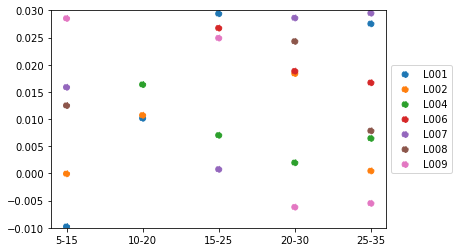

In [8]:
import warnings
warnings.simplefilter("ignore", UserWarning)
fl = np.arange(5,30,5)
fu = np.arange(15,40,5)
direc='/Users/psuroyo/Downloads/'
folder_year ='Noise_1/2019'
netsta= ['LV.L001','LV.L002','LV.L004','LV.L006','LV.L007','LV.L008','LV.L009']#,
        # 'UR.AQ01','UR.AQ02','UR.AQ03','UR.AQ04','UR.AQ05','UR.AQ06','UR.AQ07',
         #'UR.AQ09','UR.AQ10','UR.AQ12']
chan =['HHE']#['HHE','HHN','HHZ']
nets = [f.split('.')[0] for f in netsta]
stas = [f.split('.')[1] for f in netsta]
dest_dir =os.path.join("/Users/psuroyo/Downloads/Noise_trim",'kappa_store')
folder_noise ='Noise_trim/2019'

fig,cx =plt.subplots()
for i in range(len(netsta)):
    net = nets[i]
    sta =stas[i]
    for cha in chan:
        newpath = os.path.join(direc,folder_noise,net,sta,cha) 
        dsc = plotkf_sta(newpath,net,sta,cha,fl,fu)
        xlable = []
        ylable = []
        for i in range(len(fl)):
            a  = dsc[dsc.fl == fl[i]]
            a = a.reset_index(drop=True)
            a['xlbl'] = (a.fl).astype(str)+'-'+(a.fu).astype(str)
            k0 = np.mean((a))
            x = np.arange(k0.fl,k0.fu)
            pols=np.poly1d([-k0.kr *(2*np.pi),round(k0.cr,1)])
            xlable.append(a.xlbl[0])
            ylable.append(np.mean(a.kr))
        cx.scatter(xlable,ylable,linestyle='-.',label=sta)
        cx.set_ylim([-0.01,0.03])
        cx.set(xlabel=None)
        cx.set(ylabel=None)
        cx.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# TOTAL NO OF RECORDS PER STATION

In [9]:
netsta= ['LV.L001','LV.L002','LV.L004','LV.L006','LV.L007','LV.L008','LV.L009',
        'UR.AQ01','UR.AQ02','UR.AQ03','UR.AQ04','UR.AQ05','UR.AQ06','UR.AQ07',
        'UR.AQ09','UR.AQ10','UR.AQ12', 'CU.PNR01','CU.PNR02','CU.PNR3A','CU.PNR3B','CU.PNR04',
        'CU.PNR05','CU.PNR06','CU.PNR07']
nets = [f.split('.')[0] for f in netsta]
stas = [f.split('.')[1] for f in netsta]

norec=[522,528,147,84,1311,471,651,
      345,372,381,390,402,381,384,360,378,396,
      66,72,36,66,69,72,75,36]

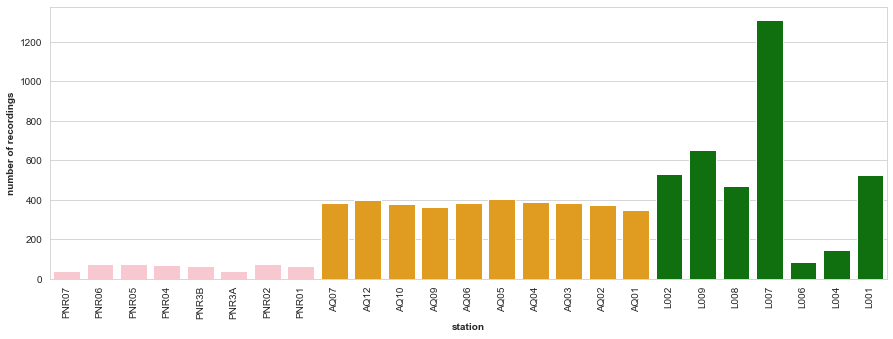

In [10]:

list_clrs = ['green','orange','pink']

clrs=[]

for i in range(len(netsta)):
    sta= stas[i]
    n = norec[i]
    if nets[i]=='LV':
        clrs.append(list_clrs[0])
    elif nets[i]=='UR':
        clrs.append(list_clrs[1])
    else:
        clrs.append(list_clrs[2])
        
dc = pd.DataFrame({"colors": clrs,"sta": stas, "net": nets,"number_rec":norec})
dc.sort_values('colors',inplace=True, ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
bar_plot = sns.barplot(x=dc["sta"],y=dc["number_rec"],
                        palette=dc["colors"])
bar_plot.set_xlabel('station', fontweight='bold')
bar_plot.set_ylabel('number of recordings', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

fig.savefig(os.path.join(dest_dir,'figure1.png'))

In [15]:
netsta

['LV.L001',
 'LV.L002',
 'LV.L004',
 'LV.L006',
 'LV.L007',
 'LV.L008',
 'LV.L009',
 'UR.AQ01',
 'UR.AQ02',
 'UR.AQ03',
 'UR.AQ04',
 'UR.AQ05',
 'UR.AQ06',
 'UR.AQ07',
 'UR.AQ09',
 'UR.AQ10',
 'UR.AQ12',
 'CU.PNR01',
 'CU.PNR02',
 'CU.PNR3A',
 'CU.PNR3B',
 'CU.PNR04',
 'CU.PNR05',
 'CU.PNR06',
 'CU.PNR07']